# Exercise: Thermistor

In [8]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

np.random.seed(0)

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

A [thermistor](https://en.wikipedia.org/wiki/Thermistor) is a temperature dependent resistor that can be used as a temperature sensor. Most resistors come with a datasheet containing a table of temperatures and resistances.

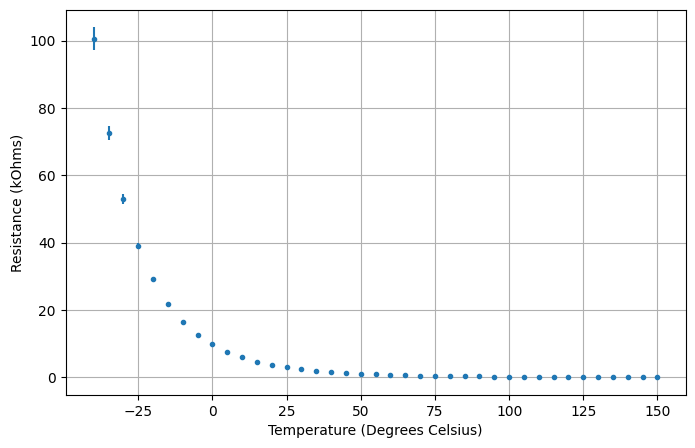

In [9]:
data = np.genfromtxt('thermistor.csv', delimiter=';', skip_header=1)
T = data[:,0] # Degrees Celsius
Rmin = data[:,1] # Ohms
R = data[:,2] # Ohms
Rmax = data[:,3] # Ohms

fig = plt.figure()
ax = fig.add_subplot(111)
yerr=np.vstack((R-Rmin, Rmax-R))
ax.errorbar(T, R/1000.0, yerr=yerr/1000.0, fmt='.')
ax.set_xlabel('Temperature (Degrees Celsius)')
ax.set_ylabel('Resistance (kOhms)')
ax.plot()
ax.grid()

A model describing the connection between temperature und resistance is the [Steinhard-Hard model](https://en.wikipedia.org/wiki/Steinhart%E2%80%93Hart_equation):

$$
T=\frac{1}{A+B\,\ln R+C\,(\ln R)^3}
$$

In the model, $T$ is the temperature in degrees Kelvin, $R$ is the resistance in Ohms and $A$, $B$ and $C$ are the model parameters.

Once the model is identified (meaning A, B and C are known), you can easily translate any resistance measured from a thermistor-based sensor into a temperature value using the equation above.

## Question

1. Use the data from the data sheet to identify the three model parameters $A$, $B$ and $C$ using least-squares optimization. Model input is $R$, model output is $T$. Good initial value for all three model parameters is 1e-3 each.
2. Plot the residuals

In [10]:
def objective_function(x, R, T):
    A, B, C = x
    Test = 1/(A+B*np.log(R)+C*np.log(R)**3)
    return Test - T

In [ ]:
x0 = [1e-3, 1e-3, 1e-3]
result = least_squares(objective_function, x0, args=(R, T+273.15))
print(result)

[-40. -35. -30. -25. -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.
  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.  95.
 100. 105. 110. 115. 120. 125. 130. 135. 140. 145. 150.]
     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [-1.614e-04 -1.188e-04 ... -1.955e-03  1.260e-03]
           x: [ 1.405e-03  2.370e-04  1.011e-07]
        cost: 7.806489982068702e-06
         jac: [[-5.436e+04 -6.261e+05 -8.265e+07]
               [-5.672e+04 -6.348e+05 -7.914e+07]
               ...
               [-1.748e+05 -7.227e+05 -1.234e+07]
               [-1.791e+05 -7.192e+05 -1.160e+07]]
        grad: [-2.946e-04 -2.651e-03 -2.408e-01]
  optimality: 0.24081135405504028
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00]
        nfev: 34
        njev: 25


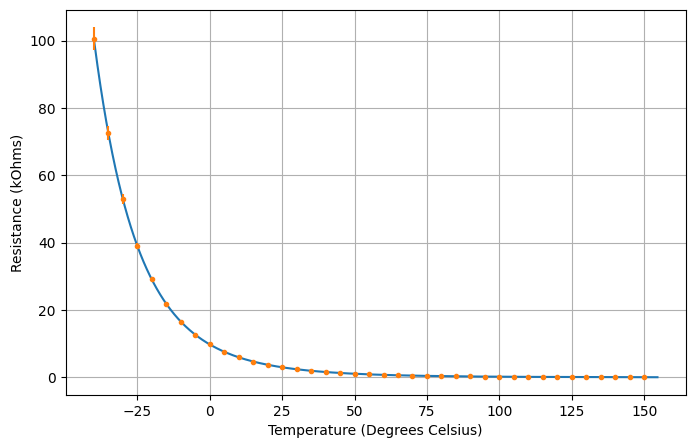

In [12]:
Rcalc = np.linspace(50, 100e3, 1000)
Tcalc = (1/(result.x[0]+result.x[1]*np.log(Rcalc)+result.x[2]*np.log(Rcalc)**3))-273.15
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Tcalc, Rcalc/1e3)
ax.errorbar(T, R/1000.0, yerr=yerr/1000.0, fmt='.')
ax.set_xlabel('Temperature (Degrees Celsius)')
ax.set_ylabel('Resistance (kOhms)')
ax.plot()
ax.grid()

[-1.61380003e-04 -1.18837975e-04 -8.03715428e-05 -4.52878501e-05
 -1.06918939e-05  1.44388379e-05  4.47735609e-05  6.25909746e-05
  7.52346846e-05  9.98012485e-05  9.14376668e-05  8.80542840e-05
  9.28319825e-05  1.00629822e-04  1.14791898e-04  8.49583993e-05
  6.64679433e-05  7.11637485e-05  3.23432840e-06  4.35813980e-05
  1.93738019e-05  1.16860566e-04 -6.93399386e-05  1.40568431e-04
 -3.11519305e-04 -3.62573132e-07 -2.91301692e-04 -1.05188922e-04
 -1.04746374e-03  5.18591074e-04  5.52761055e-04 -7.74745641e-05
 -1.07038806e-03  1.23251423e-03 -1.71599294e-03  7.80478736e-04
  1.39190384e-03 -1.95542270e-03  1.25971741e-03]


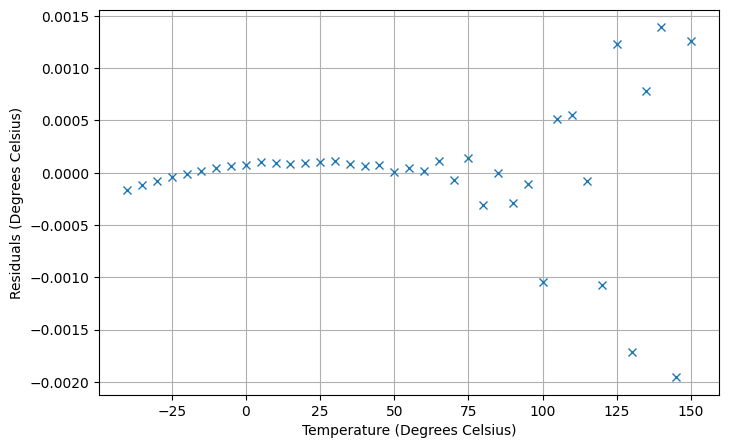

In [16]:
residuals = objective_function(result.x, R, T+273.15)

print(residuals)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(T, residuals, 'x')
ax.set_xlabel('Temperature (Degrees Celsius)')
ax.set_ylabel('Residuals (Degrees Celsius)')
ax.plot()
ax.grid()